# $\text{ARIMA}(p,d,q)$

ARIMA stands for Auto Regressive Integrated Moving Average. The intent of $\text{ARIMA}(p,d,q)$ is to construct a stationary, $\text{ARMA}(p,q)$</br>
time series from a non-stationary time series by differencing $d$ times. Recall that an $\text{ARMA}(p,q)$ process is defined by,

$
\begin{align}
X_t = \varepsilon_t + \sum_{i=1}^p \varphi_i X_{t-i} + \sum_{i=1}^q \vartheta_i \varepsilon_{t-i}
\end{align}
$

In terms of the lag operator $L X_t = X_{t-1}, L^2 X_t = X_{t-2}, L^3 X_t = X_{t-3}, \ldots$, The $\text{ARMA}(p,q)$ model can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The difference operator is given by $\Delta = (1 - L)$. If $X_t$ is stationary after $d$ differences it follows that $\left( 1 - L \right)^d X_t$ is stationary. This is the definition of integration order.</br> 
Thus, $\text{ARIMA}(p,d,q)$ can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) \left( 1 - L \right)^d X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The procedure followed to determine the order and coefficients of an $\text{ARIMA}(p,d,q)$ series is as follows.

1. Use ADF test to determine if series is stationary. To determine $d$ difference series until ADF test fails.
2. User PACF/ACF analysis to determine $p$ and $q$.
3. Perform regression on differenced series to determine coefficients.

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (Func, Source, Est, Test, PlotType)
from lib import (stack, comparison)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## $\text{ARIMA}(1,1,0)$ Example

In [2]:
nsample = 1000
σ = 1.0
nlags = 10

In [3]:
φ = [0.5]
d = 1
ar = Source.AR.create(φ=φ, npts=nsample)
arima = Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Func.DIFF.apply(arima, ndiff=1)

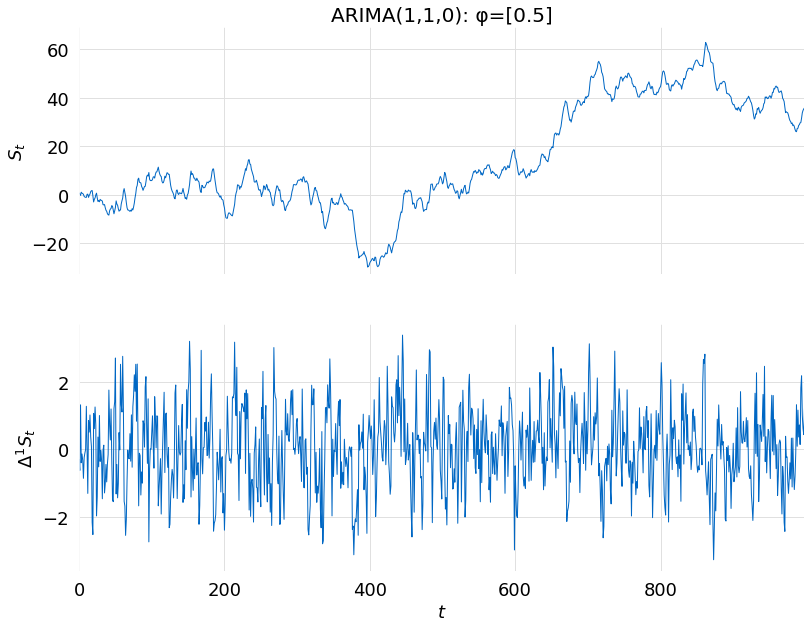

In [4]:
title=f"ARIMA(1,1,0): φ={φ}"
stack([arima, diff_1], title=title)

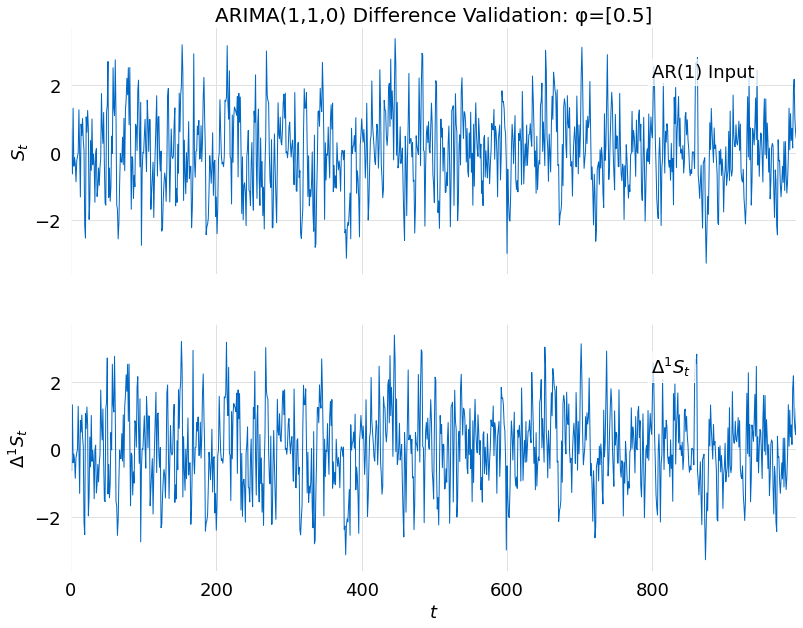

In [5]:
title = f"ARIMA(1,1,0) Difference Validation: φ={φ}"
stack([ar, diff_1], title=title, labels=[r"AR(1) Input", r"$\Delta^1 S_t$"])

In [6]:
result = Test.STATIONARITY.perform(arima)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │  -0.751452 │
├────────────────┼────────────┤
│ pvalue         │   0.390933 │
├────────────────┼────────────┤
│ Lags           │   1        │
├────────────────┼────────────┤
│ Number Obs     │ 998        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56798 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [7]:
arima.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '10/06/2022 14:07:02',
 'Type': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'Name': 'ARIMA(p, 1, q)-Simulation-ad11b6be-c629-4ce0-9130-4f138d104257',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 1},
  'Description': 'ARIMA(1) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False,
    'TestHypothesis': <TestHypothesis.LOWER_TAIL: 'LOWER_TAIL'>,
    'TestType': <Test.STATIONARITY: 'STATIONARITY'>,
    'ImplType': <_TestImpl.ADF: 'ADF'>,
    'Description': 'ADF Test',
    'TestData': [{'Status': True,
      'Statistic': {'Value': -0.7514517709381745, 'Label': '$t$'},
      'PValue': {'Value': 0.39093284128981753, 'Label': 'p-value'},
      'Parameters': [],
      '

In [8]:
result = Test.STATIONARITY.perform(diff_1)
result.summary()

╒════════════════╤═══════════════╕
│ Test Statistic │ -18.5732      │
├────────────────┼───────────────┤
│ pvalue         │   3.76332e-29 │
├────────────────┼───────────────┤
│ Lags           │   0           │
├────────────────┼───────────────┤
│ Number Obs     │ 998           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56798 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [9]:
diff_1.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 1, q)-Simulation-ad11b6be-c629-4ce0-9130-4f138d104257',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '10/06/2022 14:07:02',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'TIME_SERIES-3b4bcefb-e099-4635-b0ed-0a79f1164035',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 1},
  'Description': 'ARIMA(1) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 999,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 1},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{1} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': True,

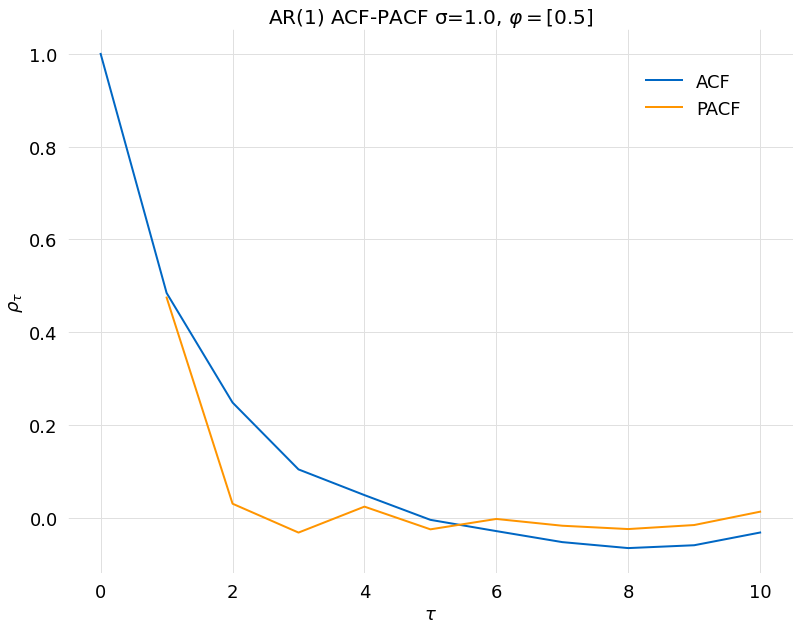

In [10]:
acf = Func.ACF.apply(diff_1, nlags=nlags)
pacf = Func.PACF.apply(diff_1, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [11]:
result = Est.AR.perform(diff_1, order=1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  999
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1441.033
Date:                Fri, 10 Jun 2022   AIC                           2888.067
Time:                        14:07:03   BIC                           2902.787
Sample:                             0   HQIC                          2893.662
                                - 999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0371      0.063      0.591      0.555      -0.086       0.160
ar.L1          0.4845      0.027     17.886      0.000       0.431       0.538
sigma2         1.0479      0.048     22.020      0.000       0.955       1.141
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.80   Prob(JB):                         0.88
Heteroskedasticity (H):               0.73   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(1,2,0)$ Example

In [12]:
φ = [0.75]
d = 2
ar = Source.AR.create(φ=φ, npts=nsample)
arima = Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Func.DIFF.apply(arima, ndiff=1)
diff_2 = Func.DIFF.apply(arima, ndiff=2)

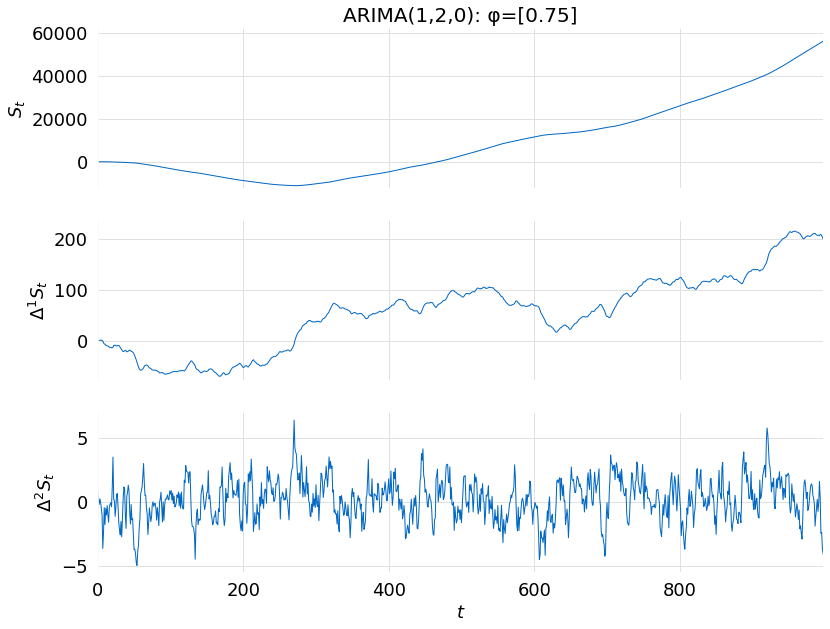

In [13]:
title = f"ARIMA(1,2,0): φ={φ}"
stack([arima, diff_1, diff_2], title=title)

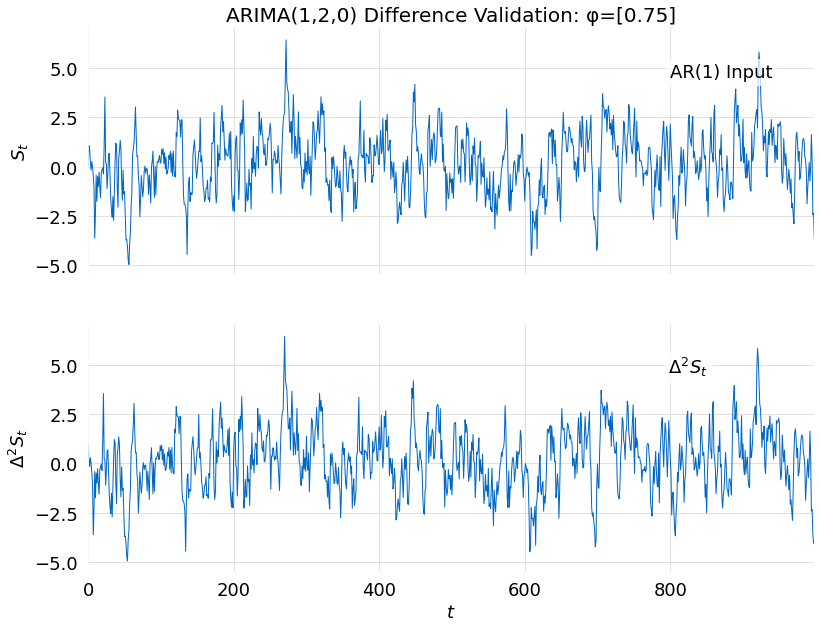

In [14]:
title = f"ARIMA(1,2,0) Difference Validation: φ={φ}"
stack([ar, diff_2], title=title, labels=[r"AR(1) Input", r"$\Delta^2 S_t$"])

In [15]:
result = Test.STATIONARITY.perform(arima)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │   0.343417 │
├────────────────┼────────────┤
│ pvalue         │   0.786424 │
├────────────────┼────────────┤
│ Lags           │   2        │
├────────────────┼────────────┤
│ Number Obs     │ 997        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [16]:
arima.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '10/06/2022 14:07:03',
 'Type': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'Name': 'ARIMA(p, 2, q)-Simulation-678d2ac5-ee0c-4877-b6c9-95786177b851',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False,
    'TestHypothesis': <TestHypothesis.LOWER_TAIL: 'LOWER_TAIL'>,
    'TestType': <Test.STATIONARITY: 'STATIONARITY'>,
    'ImplType': <_TestImpl.ADF: 'ADF'>,
    'Description': 'ADF Test',
    'TestData': [{'Status': True,
      'Statistic': {'Value': 0.34341746020740227, 'Label': '$t$'},
      'PValue': {'Value': 0.7864243982574575, 'Label': 'p-value'},
      'Parameters': [],
      'S

In [17]:
result = Test.STATIONARITY.perform(diff_1)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │   0.436729 │
├────────────────┼────────────┤
│ pvalue         │   0.809945 │
├────────────────┼────────────┤
│ Lags           │   1        │
├────────────────┼────────────┤
│ Number Obs     │ 997        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [18]:
diff_1.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-678d2ac5-ee0c-4877-b6c9-95786177b851',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '10/06/2022 14:07:03',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'TIME_SERIES-057fa14a-72ce-4dd4-b199-3587b4de2c8d',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 999,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 1},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{1} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False

In [19]:
result = Test.STATIONARITY.perform(diff_2)
result.summary()

╒════════════════╤═══════════════╕
│ Test Statistic │ -10.8467      │
├────────────────┼───────────────┤
│ pvalue         │   1.50336e-19 │
├────────────────┼───────────────┤
│ Lags           │   0           │
├────────────────┼───────────────┤
│ Number Obs     │ 997           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [20]:
diff_2.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-678d2ac5-ee0c-4877-b6c9-95786177b851',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '10/06/2022 14:07:03',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'TIME_SERIES-bdc4fb94-0310-483b-b9c5-b1dec95b2504',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 998,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 2},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{2} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': True,

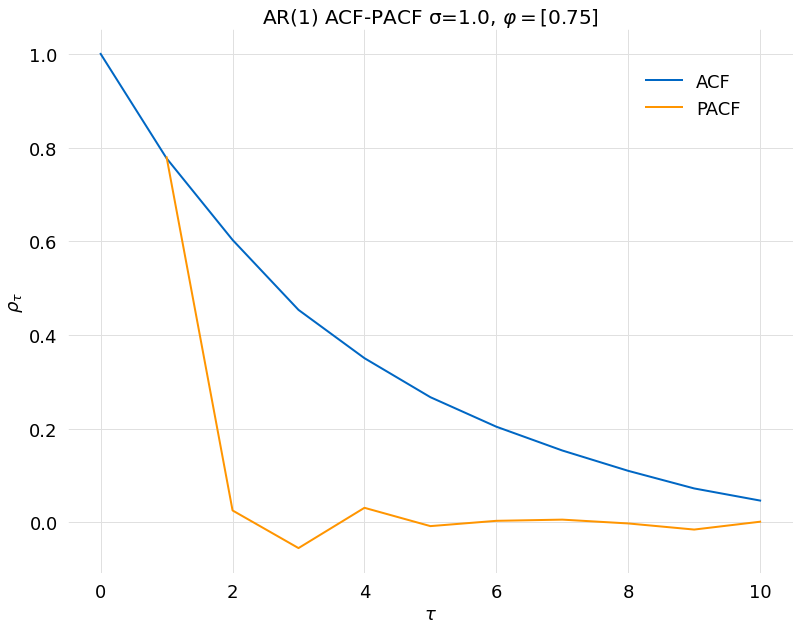

In [21]:
acf = Func.ACF.apply(diff_2, nlags=nlags)
pacf = Func.PACF.apply(diff_2, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [22]:
result = Est.AR.perform(diff_2, order=1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  998
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1405.906
Date:                Fri, 10 Jun 2022   AIC                           2817.811
Time:                        14:07:05   BIC                           2832.529
Sample:                             0   HQIC                          2823.406
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1832      0.144      1.276      0.202      -0.098       0.465
ar.L1          0.7820      0.019     41.431      0.000       0.745       0.819
sigma2         0.9788      0.044     22.132      0.000       0.892       1.066
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.98   Prob(JB):                         0.87
Heteroskedasticity (H):               0.94   Skew:                             0.04
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(2,2,0)$ Example

In [23]:
φ = [0.25, 0.4]
d = 2
ar = Source.AR.create(φ=φ, npts=nsample)
arima = Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Func.DIFF.apply(arima, ndiff=1)
diff_2 = Func.DIFF.apply(arima, ndiff=2)

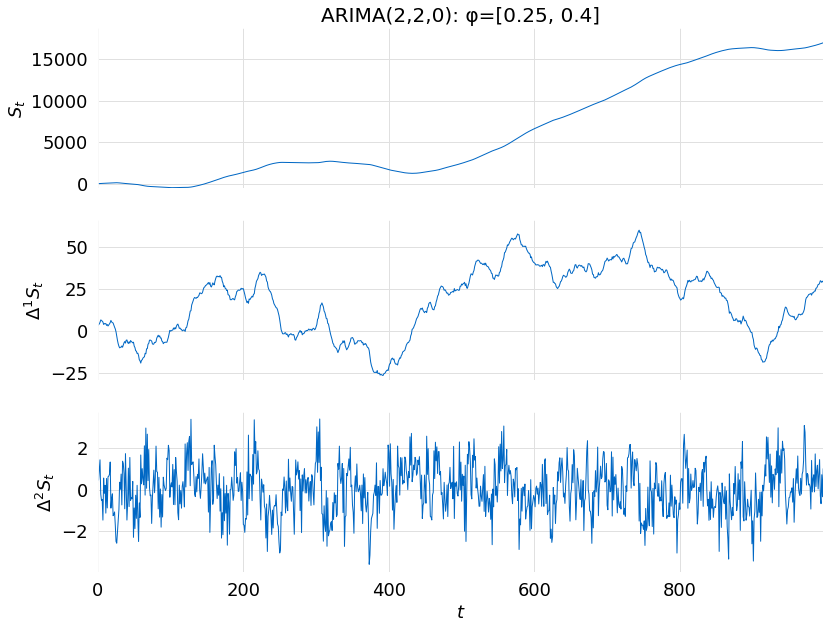

In [24]:
title = f"ARIMA(2,2,0): φ={φ}"
stack([arima, diff_1, diff_2], title=title)

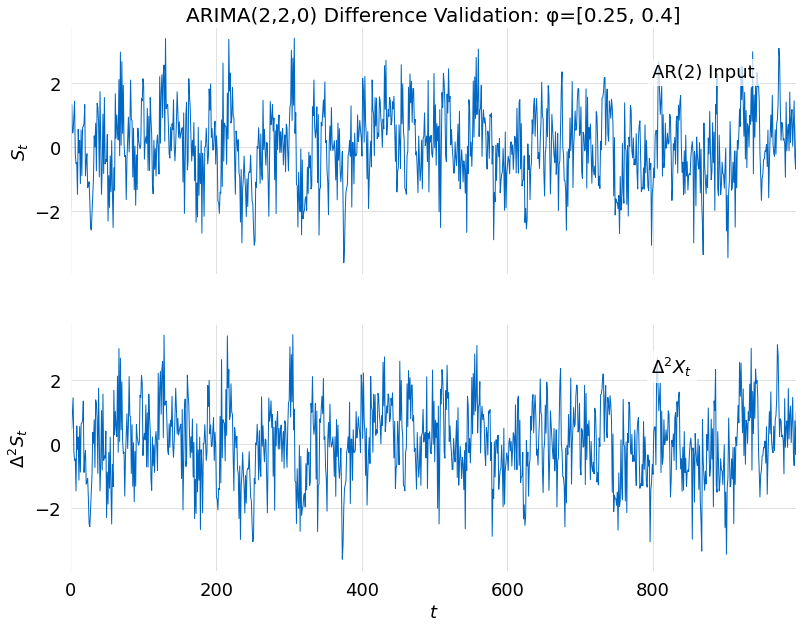

In [25]:
title = f"ARIMA(2,2,0) Difference Validation: φ={φ}"
stack([ar, diff_2], title=title, labels=[r"AR(2) Input", r"$\Delta^2 X_t$"])

In [26]:
result = Test.STATIONARITY.perform(arima)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │   0.872249 │
├────────────────┼────────────┤
│ pvalue         │   0.896965 │
├────────────────┼────────────┤
│ Lags           │   3        │
├────────────────┼────────────┤
│ Number Obs     │ 996        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [27]:
arima.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '10/06/2022 14:07:05',
 'Type': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'Name': 'ARIMA(p, 2, q)-Simulation-9ee00ea6-3105-4911-be81-69cdc82199ed',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False,
    'TestHypothesis': <TestHypothesis.LOWER_TAIL: 'LOWER_TAIL'>,
    'TestType': <Test.STATIONARITY: 'STATIONARITY'>,
    'ImplType': <_TestImpl.ADF: 'ADF'>,
    'Description': 'ADF Test',
    'TestData': [{'Status': True,
      'Statistic': {'Value': 0.8722486108596329, 'Label': '$t$'},
      'PValue': {'Value': 0.896964526547247, 'Label': 'p-value'},
      'Parameters': [],
      'Sig

In [28]:
result = Test.STATIONARITY.perform(diff_1)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │  -1.4386   │
├────────────────┼────────────┤
│ pvalue         │   0.140284 │
├────────────────┼────────────┤
│ Lags           │   2        │
├────────────────┼────────────┤
│ Number Obs     │ 996        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [29]:
diff_1.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-9ee00ea6-3105-4911-be81-69cdc82199ed',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '10/06/2022 14:07:05',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'TIME_SERIES-566385a7-66f9-46c2-b9d9-ba109a7a1275',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 999,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 1},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{1} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False

In [30]:
result = Test.STATIONARITY.perform(diff_2)
result.summary()

╒════════════════╤═══════════════╕
│ Test Statistic │ -11.3475      │
├────────────────┼───────────────┤
│ pvalue         │   1.38972e-20 │
├────────────────┼───────────────┤
│ Lags           │   1           │
├────────────────┼───────────────┤
│ Number Obs     │ 996           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [31]:
diff_2.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-9ee00ea6-3105-4911-be81-69cdc82199ed',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '10/06/2022 14:07:05',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'TIME_SERIES-1ddf639c-8c79-4127-b534-cf8b979eaab8',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 998,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 2},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{2} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': True,

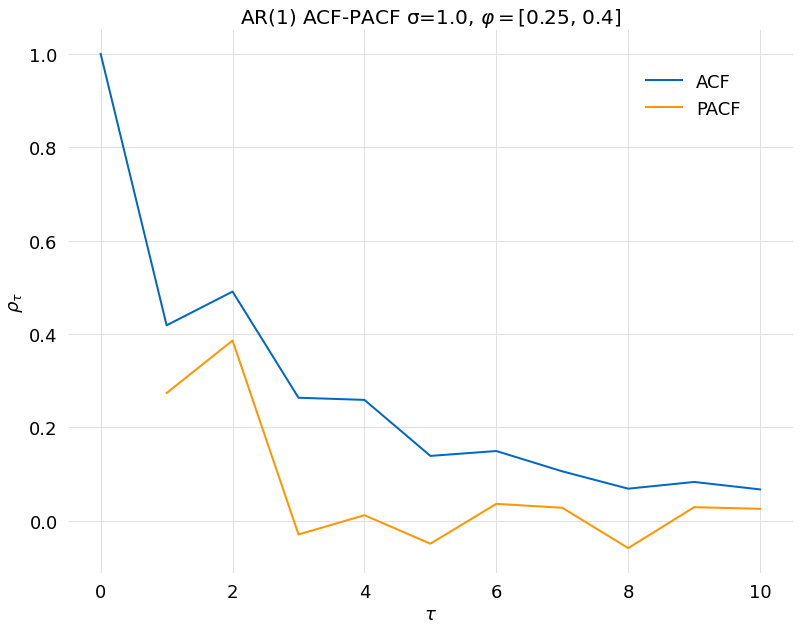

In [32]:
acf = Func.ACF.apply(diff_2, nlags=nlags)
pacf = Func.PACF.apply(diff_2, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [33]:
result = Est.AR.perform(diff_2, order=2)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  998
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1412.619
Date:                Fri, 10 Jun 2022   AIC                           2833.238
Time:                        14:07:07   BIC                           2852.861
Sample:                             0   HQIC                          2840.697
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0296      0.088      0.338      0.736      -0.142       0.202
ar.L1          0.2582      0.030      8.706      0.000       0.200       0.316
ar.L2          0.3824      0.029     13.071      0.000       0.325       0.440
sigma2         0.9925      0.046     21.552      0.000       0.902       1.083
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.68   Prob(JB):                         0.68
Heteroskedasticity (H):               0.99   Skew:                            -0.03
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""